# Case study on Pre-processing

# 1. Load the dataset into python environment

In [1]:
import pandas as pd
data=pd.read_csv("Downloads/Data science/titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.shape

(891, 12)

In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 2.Make ‘PassengerId’ as the index column

In [4]:
data=pd.read_csv("Downloads/Data science/titanic_dataset.csv",index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [5]:
data.shape

(891, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are 177 missing values in 'Age' , 687 missing values in 'Cabin' and 2 missing values in 'Embarked'.

# 4. Fill in all the missing values present in all the columns in the dataset

In [8]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [10]:
data['Age']=data['Age'].fillna(data['Age'].median())

We filled the missing values in column 'Age' with median of the column 'Age'.

In [11]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Now the number of missing values in column 'Age' is 0.

In [13]:
data['Embarked'].mode()

0    S
dtype: object

Count is highest for 's'. Therefore we are filling the remaining columns with 's'

In [14]:
data['Embarked']=data['Embarked'].fillna('S')

In [15]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [16]:
data.Cabin.nunique()

147

In [19]:
data['Cabin']=data['Cabin'].fillna(method='bfill')

In [21]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S


In [22]:
data.shape

(891, 11)

In [23]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 5. Check and handle outliers in at least 3 columns in the dataset

# 1

<AxesSubplot:ylabel='Age'>

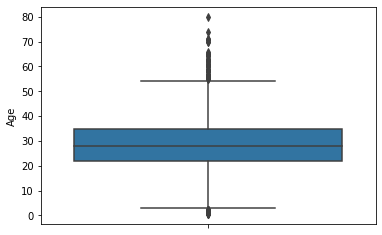

In [24]:
#To check outliers

import seaborn as sns
sns.boxplot(y='Age',data=data)

In [25]:
#To find outliers
import numpy as np
Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
Q3 = np.percentile(data['Age'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_limit = Q1 - 1.5*IQR
upp_limit = Q3 + 1.5*IQR
print('Q1 is:',Q1)
print('Q2 is:',Q2)
print('Q3 is:',Q3)
print('IQR = Q3 - Q1 =',IQR)
print('Lower limit is :',low_limit)
print('Upper limit is :',upp_limit)


Outliers=[]
for x in data['Age']:
    if ((x>upp_limit) or (x<low_limit)):
        Outliers.append(x)
print('Outliers are :\n',Outliers)


Q1 is: 22.0
Q2 is: 28.0
Q3 is: 35.0
IQR = Q3 - Q1 = 13.0
Lower limit is : 2.5
Upper limit is : 54.5
Outliers are :
 [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [26]:
#To find index of Outliers
ind1 = data['Age']>upp_limit
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [27]:
ind2 = data['Age']<low_limit
data.loc[ind2].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [28]:
#To remove Outliers
data.drop([8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832,12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

<AxesSubplot:ylabel='Age'>

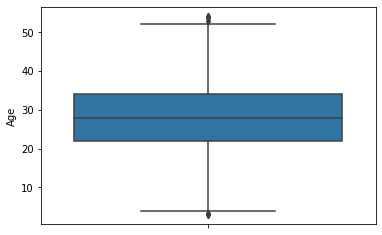

In [29]:
#To check whether outliers are removed
import seaborn as sns
sns.boxplot(y='Age',data=data)

# 2

<AxesSubplot:xlabel='Fare'>

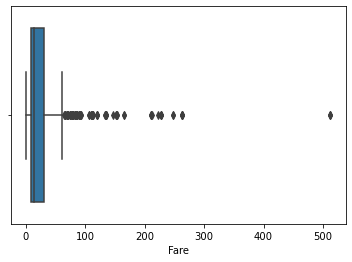

In [30]:
#To check outliers
import seaborn as sns
sns.boxplot(x='Fare',data=data)

In [31]:
#To find outliers
Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_limit = Q1 - 1.5*IQR
upp_limit = Q3 + 1.5*IQR
print('Q1 is:',Q1)
print('Q2 is:',Q2)
print('Q3 is:',Q3)
print('IQR = Q3 - Q1 =',IQR)
print('Lower limit is :',low_limit)
print('Upper limit is :',upp_limit)


Outliers=[]
for x in data['Fare']:
    if ((x>upp_limit) or (x<low_limit)):
        Outliers.append(x)
print('Outliers are :\n',Outliers)


Q1 is: 7.8958
Q2 is: 13.4167
Q3 is: 30.0708
IQR = Q3 - Q1 = 22.174999999999997
Lower limit is : -25.366699999999994
Upper limit is : 63.333299999999994
Outliers are :
 [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 63.3583, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 247.5208, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 83.1583, 69.55, 89

In [32]:
#To find index of Outliers
ind1 = data['Fare']>upp_limit
data.loc[ind1].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)

In [33]:
ind2 = data['Fare']<low_limit
data.loc[ind2].index

Int64Index([], dtype='int64', name='PassengerId')

In [34]:
data.drop(data.loc[ind1].index,inplace=True)

<AxesSubplot:xlabel='Fare'>

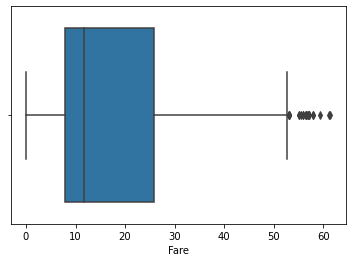

In [35]:
#To check whether outliers are removed
sns.boxplot(x='Fare',data=data)

# 3

<AxesSubplot:xlabel='Fare', ylabel='Sex'>

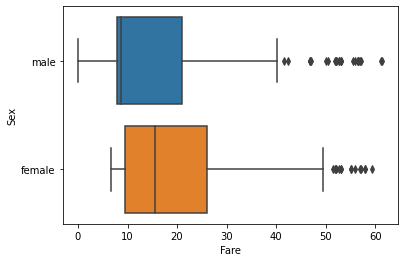

In [36]:
#To check outliers
sns.boxplot(y='Sex',x='Fare',data=data)

Here we can see that when we split fare according to sex still there are outliers.

In [37]:
#To group data for male
data1=data.groupby('Sex').get_group('male')
data1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,E46,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,D56,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,B42,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,B42,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B42,S


In [38]:
#To find Outliers
Q1 = np.percentile(data1['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data1['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data1['Fare'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_limit = Q1 - 1.5*IQR
upp_limit = Q3 + 1.5*IQR
print('Q1 is:',Q1)
print('Q2 is:',Q2)
print('Q3 is:',Q3)
print('IQR = Q3 - Q1 =',IQR)
print('Lower limit is :',low_limit)
print('Upper limit is :',upp_limit)


Outliers=[]
for x in data1['Fare']:
    if ((x>upp_limit) or (x<low_limit)):
        Outliers.append(x)
print('Outliers are :\n',Outliers)


Q1 is: 7.7958
Q2 is: 8.6625
Q3 is: 21.0
IQR = Q3 - Q1 = 13.2042
Lower limit is : -12.0105
Upper limit is : 40.8063
Outliers are :
 [51.8625, 52.0, 46.9, 56.4958, 47.1, 61.175, 52.0, 53.1, 61.3792, 56.4958, 50.0, 52.5542, 55.4417, 55.9, 52.0, 46.9, 56.4958, 56.9292, 42.4, 52.5542, 56.4958, 52.0, 46.9, 41.5792, 57.0, 56.4958, 52.0, 53.1, 53.1, 56.4958, 56.4958, 50.4958]


In [39]:
#To find index of Outliers
ind1 = data1['Fare']>upp_limit
data1.loc[ind1].index

Int64Index([  7,  36,  60,  75,  84,  93, 111, 138, 156, 170, 186, 249, 371,
            435, 476, 481, 510, 600, 603, 622, 644, 672, 684, 686, 691, 693,
            713, 725, 749, 827, 839, 868],
           dtype='int64', name='PassengerId')

In [40]:
ind2 = data1['Fare']<low_limit
data1.loc[ind2].index

Int64Index([], dtype='int64', name='PassengerId')

In [41]:
#To remove outliers
data.drop([7,  36,  60,  75,  84,  93, 111, 138, 156, 170, 186, 249, 371,
            435, 476, 481, 510, 600, 603, 622, 644, 672, 684, 686, 691, 693,
            713, 725, 749, 827, 839, 868],inplace=True)

In [42]:
#To group data for female
data2=data.groupby('Sex').get_group('female')
data2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,G6,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,G6,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
...,...,...,...,...,...,...,...,...,...,...,...
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,B42,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,B42,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,B42,Q


In [43]:
#To find Outliers
Q1 = np.percentile(data2['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data2['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data2['Fare'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_limit = Q1 - 1.5*IQR
upp_limit = Q3 + 1.5*IQR
print('Q1 is:',Q1)
print('Q2 is:',Q2)
print('Q3 is:',Q3)
print('IQR = Q3 - Q1 =',IQR)
print('Lower limit is :',low_limit)
print('Upper limit is :',upp_limit)


Outliers=[]
for x in data2['Fare']:
    if ((x>upp_limit) or (x<low_limit)):
        Outliers.append(x)
print('Outliers are :\n',Outliers)


Q1 is: 9.475
Q2 is: 15.5
Q3 is: 26.0
IQR = Q3 - Q1 = 16.525
Lower limit is : -15.312499999999998
Upper limit is : 50.787499999999994
Outliers are :
 [53.1, 55.0, 56.9292, 57.9792, 55.0, 52.0, 51.8625, 59.4, 57.9792, 51.4792, 55.9, 52.0, 57.0, 53.1, 52.5542]


In [44]:
#To find index of Outliers
ind1 = data2['Fare']>upp_limit
data2.loc[ind1].index

Int64Index([4, 167, 310, 330, 357, 384, 458, 514, 524, 572, 578, 670, 782, 810,
            872],
           dtype='int64', name='PassengerId')

In [45]:
ind2 = data2['Fare']<low_limit
data2.loc[ind2].index

Int64Index([], dtype='int64', name='PassengerId')

In [46]:
data.drop([4, 167, 310, 330, 357, 384, 458, 514, 524, 572, 578, 670, 782, 810,
            872],inplace=True)

<AxesSubplot:xlabel='Fare', ylabel='Sex'>

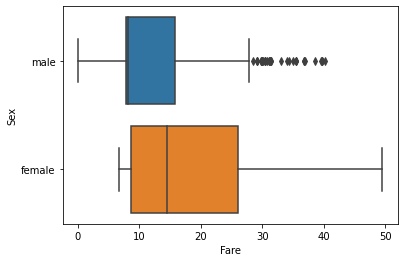

In [47]:
#To check whether outliers are removed
sns.boxplot(y='Sex',x='Fare',data=data)

In [ ]:
#Now let us check the outliers of column 'Fare' again

<AxesSubplot:xlabel='Fare'>

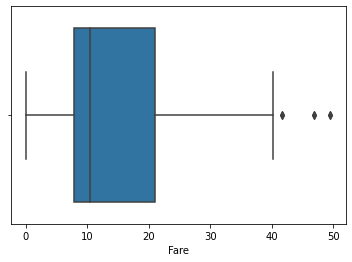

In [48]:
sns.boxplot(x='Fare',data=data)

Almost all the outliers removed.

In [49]:
data.shape

(671, 11)

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [50]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000
mean,0.317437,2.587183,27.737705,0.383010,0.317437,14.652154
std,0.465826,0.644899,9.818566,0.816405,0.794934,9.365952
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.854200
50%,0.000000,3.000000,28.000000,0.000000,0.000000,10.500000
75%,1.000000,3.000000,32.000000,1.000000,0.000000,21.000000
max,1.000000,3.000000,54.000000,5.000000,6.000000,49.504200


In [51]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [53]:
x=data.drop(['Name','Sex','Ticket','Embarked','Cabin'],axis=1)
x.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000
mean,0.317437,2.587183,27.737705,0.383010,0.317437,14.652154
std,0.465826,0.644899,9.818566,0.816405,0.794934,9.365952
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.854200
50%,0.000000,3.000000,28.000000,0.000000,0.000000,10.500000
75%,1.000000,3.000000,32.000000,1.000000,0.000000,21.000000
max,1.000000,3.000000,54.000000,5.000000,6.000000,49.504200


In [54]:
import pandas as pd
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000
mean,0.317437,0.793592,0.485053,0.076602,0.052906,0.295978
std,0.465826,0.322450,0.192521,0.163281,0.132489,0.189195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.372549,0.000000,0.000000,0.158657
50%,0.000000,1.000000,0.490196,0.000000,0.000000,0.212103
75%,1.000000,1.000000,0.568627,0.200000,0.000000,0.424206
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
